## Importing Importent Library which will help to Analyse the Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
#Read the data sheet using pd.
Bike_df = pd.read_csv("day.csv")
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike_df.shape

(730, 16)

#### from the above command there are 730 rows and 16 column
#### now wil see about data type and description of data frame

In [4]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# will check whether data frame have missing/null value.
Bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### As we saw dteday is Object type we should change the data type and extract day month year.

In [7]:
Bike_df["dteday"].dtype

dtype('O')

In [8]:
Bike_df["dteday"] = pd.to_datetime(Bike_df["dteday"],format= "%d-%m-%Y")
Bike_df["dteday"].dtype

dtype('<M8[ns]')

In [9]:
Bike_df["month"]= pd.DatetimeIndex(Bike_df["dteday"]).month
Bike_df["year"]= pd.DatetimeIndex(Bike_df["dteday"]).year

In [10]:
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,2018
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,2018
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,2018
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,2018


### Rename Hum and cnt column for better reading

In [11]:
Bike_df.rename(columns={'hum': 'humidity', 'cnt': 'count'}, inplace=True)

In [12]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  humidity    730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  count       730 non-null    int64         
 16  month       730 non-null  

#### As per Data dictionary yr and mnth is not use for model building
#### as we have extracted correct month and year from the dteday.
#### hence will drop that two column yr and mnth, and proceed with the modify one.

In [13]:
Bike_df.drop(["yr","mnth"],axis =1, inplace =True)

In [14]:
Bike_df.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,1,2018-01-01,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018
1,2,2018-01-02,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,2018
2,3,2018-01-03,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,2018
3,4,2018-01-04,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,2018
4,5,2018-01-05,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,2018


### we will drop some more column like instant(this has only serial number) and dteday.
### casual and registered have already consolidated data with the column cnt.

In [15]:
Bike_df.drop(["instant","casual","registered","dteday"],axis =1, inplace =True)

In [16]:
Bike_df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,2018
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,2018
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,2018
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,2018
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,2018


In [17]:
Bike_df.drop(["holiday"], axis=1,inplace= True)

In [18]:
Bike_df.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,2018
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,2018
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,2018
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,2018
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,2018


### need to map the season column
### - season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [19]:

Bike_df['season'] = Bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [20]:
Bike_df.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,spring,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,2018
1,spring,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,2018
2,spring,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,2018
3,spring,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,2018
4,spring,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,2018


### need to map also for weathersit
#### weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
Bike_df['weathersit'] = Bike_df['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [22]:
Bike_df.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,spring,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,2018
1,spring,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,2018
2,spring,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,2018
3,spring,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,2018
4,spring,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,2018


<AxesSubplot:xlabel='season', ylabel='count'>

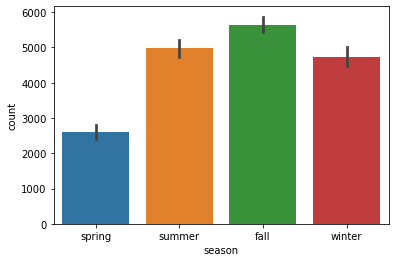

In [23]:
# visualization of data like season vs count and weathersit vs count
sns.barplot("season", "count",data= Bike_df)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

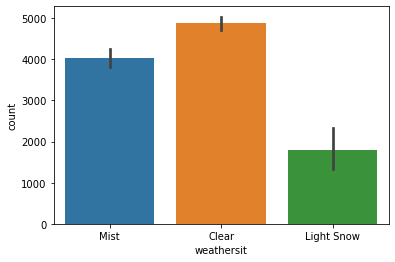

In [24]:
sns.barplot("weathersit", "count",data= Bike_df)

### bike seems to be rented more during season Fall and in clear weather 

## About working day
### workingday : if day is neither weekend nor holiday is 1, otherwise is 0
### need to map and visualize this data as well

In [25]:
Bike_df["workingday"] = Bike_df["workingday"].map({1:'working_day',0:'Holiday'})

<AxesSubplot:xlabel='workingday', ylabel='count'>

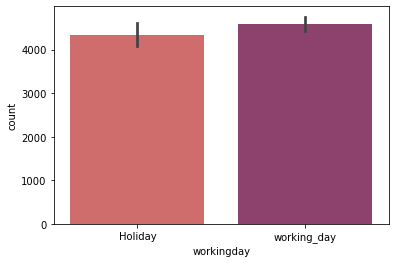

In [26]:
sns.barplot("workingday","count",data = Bike_df,palette= "flare")

### year
- 2018:0
- 2019:1

In [27]:
Bike_df["year"]= Bike_df["year"].map({2018:0,2019:1})

<AxesSubplot:xlabel='year', ylabel='count'>

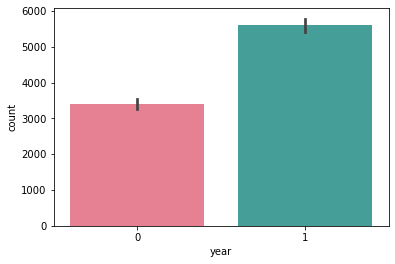

In [28]:
sns.barplot("year","count",data = Bike_df, palette = "husl")

### Bike popularity increased in 2019 as compared to 2018

### Now will map all month data and visualize with respect to both year 2018 and 2019
### Month
- 1:Jan
- 2:Feb
- 3:Mar
- 4:Apr
- 5:May
- 6:June
- 7:July
- 8:Aug
- 9:Sep
- 10:Oct
- 11:Nov
- 12:Dec

In [29]:
Bike_df["month"] = Bike_df["month"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

<AxesSubplot:xlabel='month', ylabel='count'>

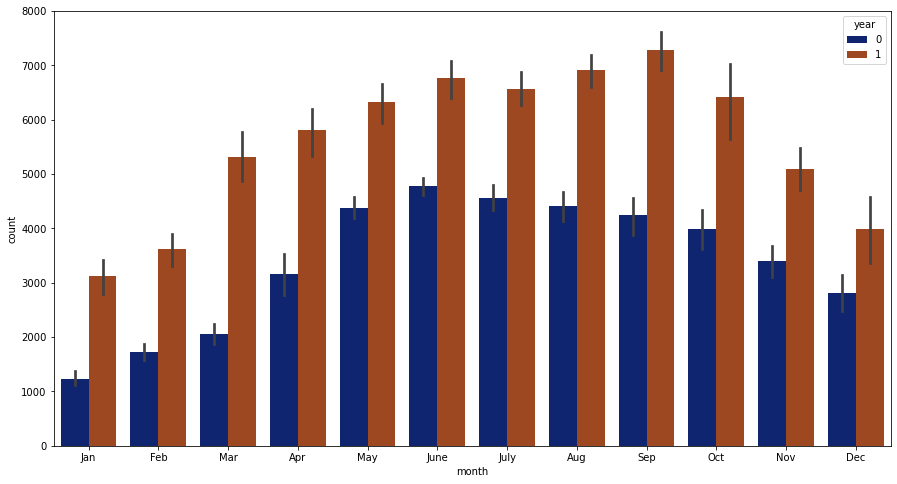

In [30]:
plt.figure(figsize=(15,8))
sns.barplot('month','count',hue='year',data=Bike_df,palette='dark')

### WeekDay
- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

In [31]:
Bike_df['weekday'] = Bike_df['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

<AxesSubplot:xlabel='weekday', ylabel='count'>

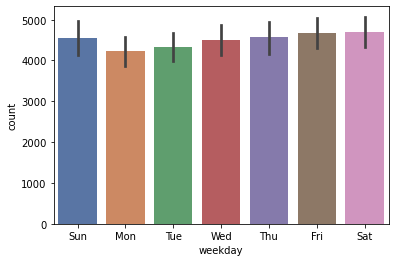

In [32]:
sns.barplot("weekday","count", data = Bike_df, palette = "deep")

In [33]:
Bike_df.groupby('weekday').size()

weekday
Fri    104
Mon    105
Sat    104
Sun    105
Thu    103
Tue    105
Wed    104
dtype: int64

### The more count on Monday,sunday and Tuesday

<AxesSubplot:xlabel='temp', ylabel='count'>

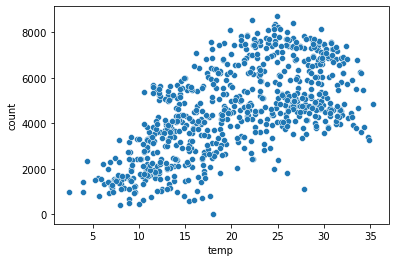

In [34]:
sns.scatterplot("temp","count",data = Bike_df)

<AxesSubplot:xlabel='atemp', ylabel='count'>

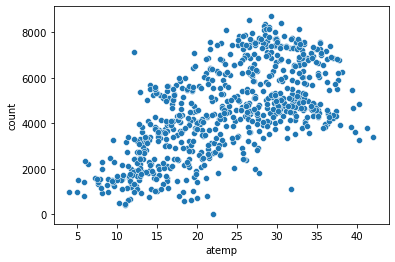

In [35]:
sns.scatterplot("atemp","count",data = Bike_df)

### Bike rented are more at higher feel Like tempreture.

<AxesSubplot:xlabel='humidity', ylabel='count'>

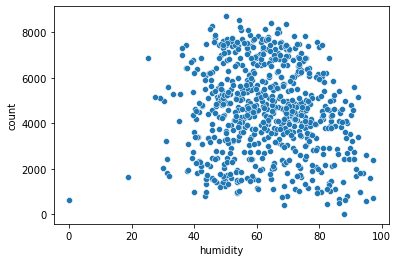

In [36]:
sns.scatterplot("humidity","count",data = Bike_df)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

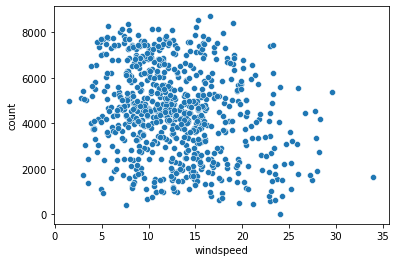

In [37]:
sns.scatterplot("windspeed","count",data = Bike_df)

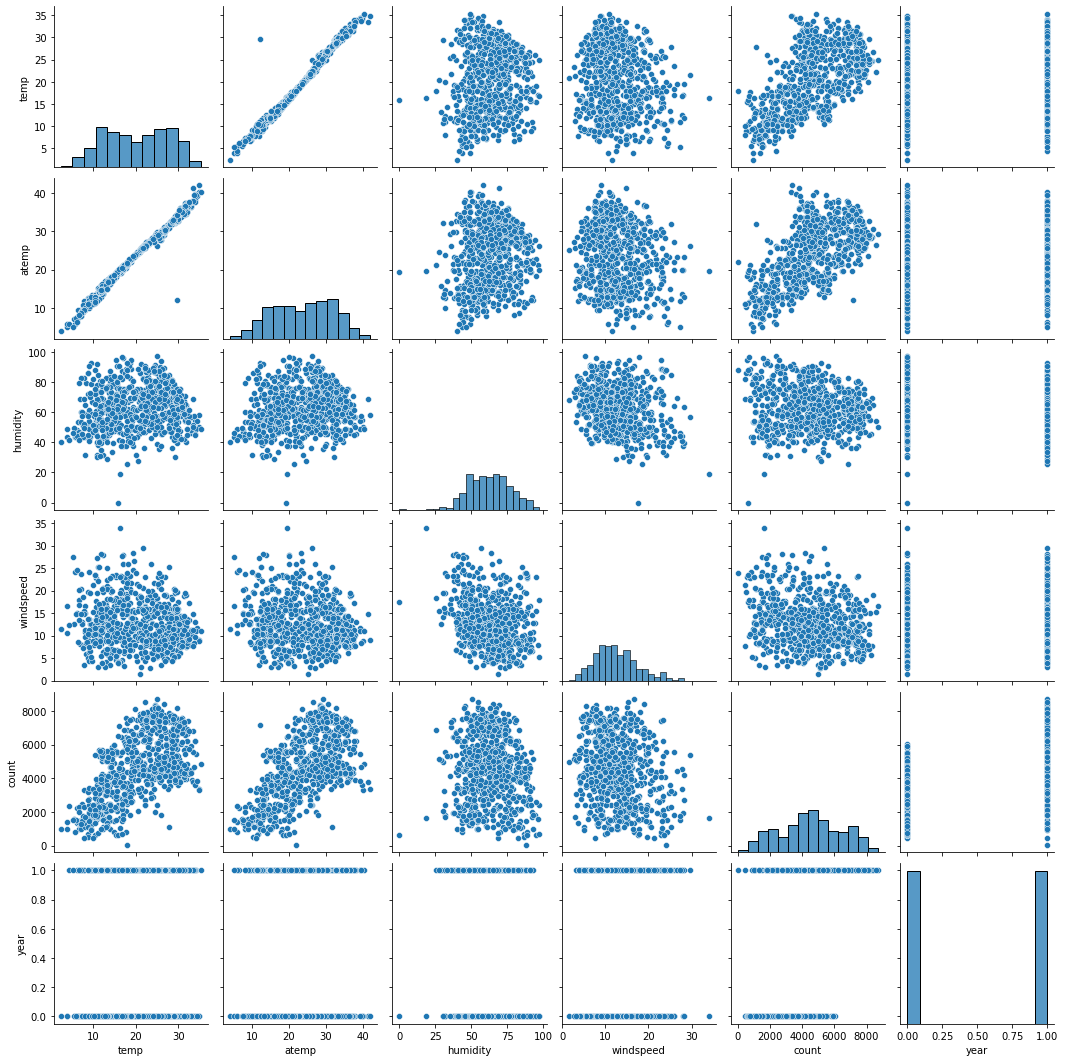

In [38]:
# lets draw pairplot
sns.pairplot(Bike_df)

###  let see clear visualize and relation with the help of heatmap

<AxesSubplot:>

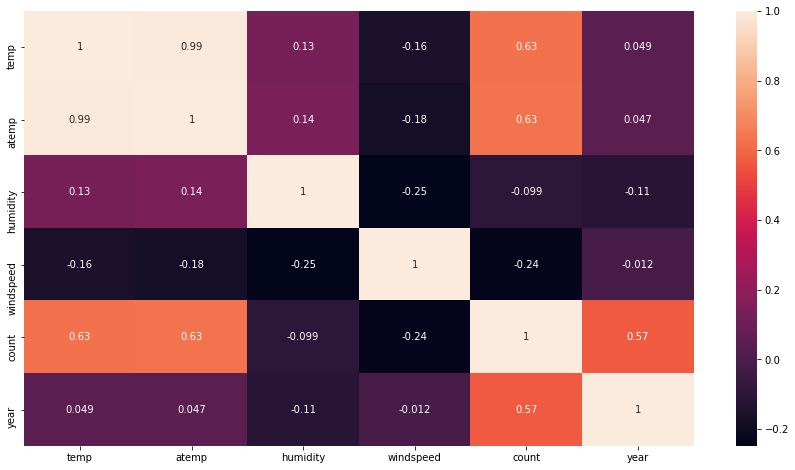

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(Bike_df.corr(),annot=True)

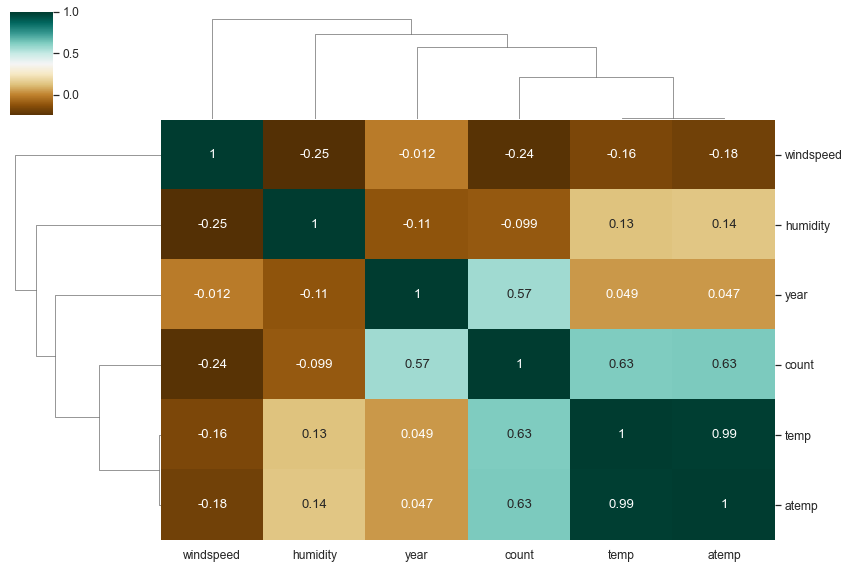

In [40]:
Bike_correlation = Bike_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(Bike_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

### temp and atemp are higly correlated its showing as 0.99.
### better need to drop one variable to avoid multicollinearity.

In [41]:
Bike_df.drop('atemp',axis=1,inplace=True)

In [42]:
Bike_df.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,month,year
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,Jan,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,Jan,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,Jan,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,Jan,0
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,Jan,0


### now there are some categorial variable and need to deal as dummy variable to perform model building

In [43]:
seasons = pd.get_dummies(Bike_df['season'],drop_first=True)

In [44]:
seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [45]:
working_day = pd.get_dummies(Bike_df['workingday'],drop_first=True)
weather = pd.get_dummies(Bike_df['weathersit'],drop_first=True)
month = pd.get_dummies(Bike_df['month'],drop_first=True)
week_day = pd.get_dummies(Bike_df['weekday'],drop_first=True)

In [46]:
working_day

,working_day
0,0
1,0
2,1
3,1
4,1
...,...
725,1
726,1
727,0
728,0


In [47]:
weather

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [48]:
Bike_df= pd.concat([Bike_df,seasons,working_day,weather,month,week_day],axis=1)

In [49]:
Bike_df.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,month,year,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,Jan,0,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,Jan,0,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,Jan,0,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,Jan,0,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,Jan,0,...,0,0,0,0,0,0,0,1,0,0


### need to drop categorical variables as they are already dummy-encoded

In [50]:
Bike_df.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [51]:
Bike_df.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Now Data is ready for Training,lets split the data into Test and Train

In [52]:
np.random.seed(0)
df_train, df_test = train_test_split(Bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
# rescale the feauture and apply scaler to column which has numeric value
scaler= StandardScaler()

numeric_variable=['temp','humidity','windspeed','count']

df_train[numeric_variable]= scaler.fit_transform(df_train[numeric_variable])

<AxesSubplot:xlabel='temp', ylabel='count'>

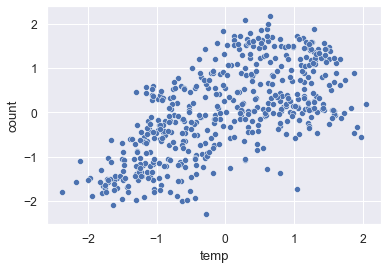

In [55]:
sns.scatterplot("temp", "count", data = df_train)

In [56]:
#lets divide train data into X and Y set
y_train = df_train.pop("count")
X_train = df_train

In [57]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)
# define the method
rfe = RFE(lm,10)
# fit the model
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [64]:
# Creating X_train dataframe with RFE selected variables as mention above
X_train_rfe = X_train[col]

In [65]:
X_train_rfe

,temp,year,spring,working_day,Light Snow,Mist,July,Sep,Mon,Sun
653,-0.121335,1,0,1,0,0,0,0,0,0
576,1.231731,1,0,1,0,0,1,0,0,0
426,-0.420478,1,1,0,0,1,0,0,0,1
728,-1.294913,1,1,0,0,0,0,0,1,0
482,-0.627580,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.273152,1,0,1,0,1,0,0,0,0
578,1.448040,1,0,1,0,0,0,0,0,0
53,-1.483204,0,1,1,0,0,0,0,0,0
350,-1.281106,0,0,0,0,1,0,0,0,1


In [66]:
y_train

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
         ...   
526    1.116587
578    1.422703
53    -1.317467
350   -0.895981
79    -1.235426
Name: count, Length: 510, dtype: float64

In [67]:
# Lets add a constent variable as straight line follow y= mx+c 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
X_train_rfe

,const,temp,year,spring,working_day,Light Snow,Mist,July,Sep,Mon,Sun
653,1.0,-0.121335,1,0,1,0,0,0,0,0,0
576,1.0,1.231731,1,0,1,0,0,1,0,0,0
426,1.0,-0.420478,1,1,0,0,1,0,0,0,1
728,1.0,-1.294913,1,1,0,0,0,0,0,1,0
482,1.0,-0.627580,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1.273152,1,0,1,0,1,0,0,0,0
578,1.0,1.448040,1,0,1,0,0,0,0,0,0
53,1.0,-1.483204,0,1,1,0,0,0,0,0,0
350,1.0,-1.281106,0,0,0,0,1,0,0,0,1


In [69]:
#Apply OLS algorithm
lm = sm.OLS(y_train,X_train_rfe).fit()

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          3.30e-179
Time:                        16:45:49   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6092      0.122     -4.974      0.000      -0.850      -0.369
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value of Mon is 0.058 so its a insignificant and need to drop and again train the model 

In [71]:
X_train_1 = X_train_rfe.drop('Mon',1)

In [72]:
X_train_2 = sm.add_constant(X_train_1)
lm1 = sm.OLS(y_train,X_train_2).fit()

In [73]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.22e-179
Time:                        16:53:05   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now P value of all variable has  <0.05

In [74]:
X_train_new = X_train_2.drop("const",axis =1)

### will Analyze VIF(varience Inflation Factor)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.28
0,temp,2.02
2,spring,2.02
1,year,1.80
5,Mist,1.50
6,July,1.35
8,Sun,1.28
7,Sep,1.17
4,Light Snow,1.06


### ALL VIF value of variable has < 5.

In [77]:
# lets do Residual Analysis

In [79]:
y_train_pred = lm1.predict(X_train_2)

Text(0.5, 1.0, 'Residual Plot')

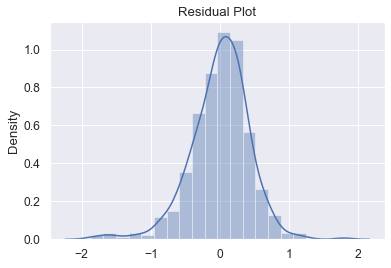

In [81]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Residual Plot")

In [89]:
#start making prediction
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [90]:
y_test = df_test.pop('count')
X_test = df_test

In [91]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
y_test_pred = lm1.predict(X_test_new)

In [93]:
r2_score(y_test, y_test_pred)

0.8075114920782749

### yes r2_score value is near by as Train model have.

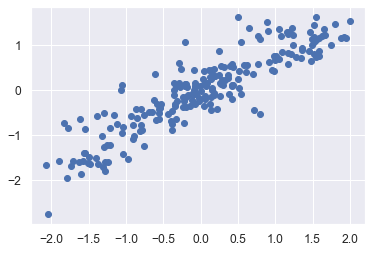

In [108]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)


In [106]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.22e-179
Time:                        17:26:30   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-0.820)*(n-1)/(n-p-1),4)
adjusted_r2

0.8113